# Overview, Understanding of Data and Business Question.

In this notebook, we got our dataset form Kaggle. Our dataset is over 5000 images of X-ray chest from childern. This dataset has 3 different folders train, test and val. every folder contains subfolders Normal and Pneumonia which included X-ray images. The Pneumonia subfolder has 2 different type of images. These images are X_ray from people with Pneumonia from Bacteria and Virus. 

Pneumonia images are different than Normal images while Pneumonia images are distinguished from each other too. 
With these differentiations, we can make model to find the pattern between images, and use that pattern to predict and recognize other future images.

The Business problem is that False Negative predictions. Like other medical cases, false negatives are really important. False negatives are predictions of Normal X-ray while they are Pneumonia. This become really dangerous when we say people that they are not sick, but they are.

Our goal here is to make model with lower False Negativ and higher metrics scores. 

# What is Pneumonia?
Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria and viruses can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

![](../final_notebook/pneu.jpg)

# Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os, shutil

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Loading the Dataset

The dataset already splits to three folders test, train and validation. Each folder has 2 Subfolders which are Normal and Pneumonia. Inside of these folders there are chest-Xrays of peopel with diagnosed of Pneumonia and peopel with Normal lung.

fter loading and craeting the first simple model, we saw a strange behavior on graph from validation accuracy and validation loss. This unusual behavior is caused by the number of validation folders. In the otiginal folders, there are only 16 images inisde the folder and this is causing a Roller coasters behavior from validation accuracy and validation loss.

I added equal number of images into both Pneumonia and Normal folders. Then make new simple model.

In [4]:
#giving pathway to load data.
test_folder = '../../data/test'
train_folder = '../../data/train/'
val_folder = '../../data/val/'

# First model

- we run the CNN model as first model here, then improve the model with early stop and some hyper Tuning 

In [5]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_folder,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size=(150, 150),
                                                        batch_size=15,
                                                        class_mode='binary')

Found 5133 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [7]:
# create the data sets
train, train_lables = next(train_generator)
val, val_labels = next(validation_generator)

In [8]:
# making more layers with Conv and Maxpooling
# still keep those Dense and Flatten layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
# fitting our training with the CNN model
new_model = model.fit_generator(train_generator, 
                              steps_per_epoch=50, 
                              epochs=20, 
                              validation_data=validation_generator, 
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
50/50 [==============================] - 20s 392ms/step - loss: 0.5318 - acc: 0.7570 - val_loss: 0.5632 - val_acc: 0.7157
Epoch 2/20
50/50 [==============================] - 19s 377ms/step - loss: 0.3873 - acc: 0.8380 - val_loss: 0.4447 - val_acc: 0.7451
Epoch 3/20
50/50 [==============================] - 19s 388ms/step - loss: 0.2786 - acc: 0.8860 - val_loss: 0.2707 - val_acc: 0.8922
Epoch 4/20
50/50 [==============================] - 19s 389ms/step - loss: 0.1889 - acc: 0.9250 - val_loss: 0.3037 - val_acc: 0.8529
Epoch 5/20
50/50 [==============================] - 19s 379ms/step - loss: 0.1802 - acc: 0.9320 - val_loss: 0.2767 - val_acc: 0.8725
Epoch 6/20
50/50 [==============================] - 20s 391ms/step - loss: 0.1404 - acc: 0.9530 - val_loss: 0.2336 - val_acc: 0.8922
Epoch 7/20
50/50 [==============================] - 19s 387ms/step - loss: 0.1322 - acc: 0.9520 - val_loss: 0.4043 - val_acc: 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
# running test set
test_generator = test_datagen.flow_from_directory(test_folder, 
                                                  target_size=(150, 150), 
                                                  batch_size=50, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
13/13 [==============================] - 7s 527ms/step - loss: 1.9976 - acc: 0.6635
test acc: 0.6634615659713745


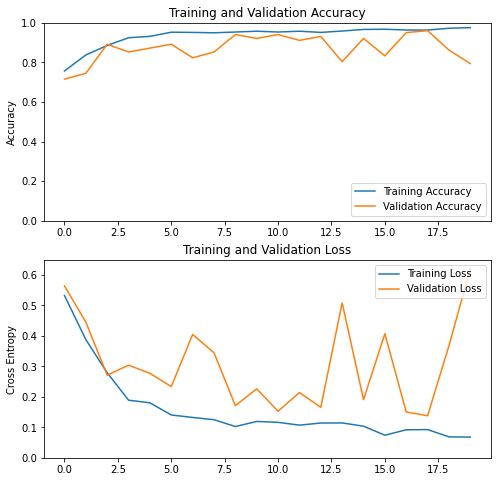

In [12]:
# plot model
acc = new_model.history['acc']
val_acc = new_model.history['val_acc']

loss = new_model.history['loss']
val_loss = new_model.history['val_loss']

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim([min(plt.ylim()), 1])
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('Cross Entropy')
ax[1].set_ylim([0,max(plt.ylim())])
ax[1].set_title('Training and Validation Loss')
plt.show();

## Adding EarlyStopping into our model

In [13]:
# Instantiate EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=0, verbose=1,
                           mode='min')

In [22]:
# using the same CNN model
# adding early stop after compiling model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=0, verbose=1,
                           mode='min')

In [23]:
# fitting our training with the CNN model and early stop
new_model_stop = new_model = model.fit_generator(train_generator, 
                              steps_per_epoch=30, 
                              epochs=20, 
                              validation_data=validation_generator, 
                              )

Epoch 1/20
30/30 [==============================] - 11s 379ms/step - loss: 0.5675 - acc: 0.7350 - val_loss: 0.9143 - val_acc: 0.5098
Epoch 2/20
30/30 [==============================] - 12s 394ms/step - loss: 0.5181 - acc: 0.7567 - val_loss: 0.7628 - val_acc: 0.5098
Epoch 3/20
30/30 [==============================] - 12s 391ms/step - loss: 0.4015 - acc: 0.8367 - val_loss: 0.5660 - val_acc: 0.6863
Epoch 4/20
30/30 [==============================] - 12s 413ms/step - loss: 0.3211 - acc: 0.8733 - val_loss: 0.4528 - val_acc: 0.7157
Epoch 5/20
30/30 [==============================] - 12s 408ms/step - loss: 0.2409 - acc: 0.9050 - val_loss: 0.2778 - val_acc: 0.9118
Epoch 6/20
30/30 [==============================] - 12s 396ms/step - loss: 0.2312 - acc: 0.9233 - val_loss: 0.4324 - val_acc: 0.7843
Epoch 7/20
30/30 [==============================] - 12s 405ms/step - loss: 0.2110 - acc: 0.9283 - val_loss: 0.3138 - val_acc: 0.8627
Epoch 8/20
30/30 [==============================] - 12s 409ms/step - 

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

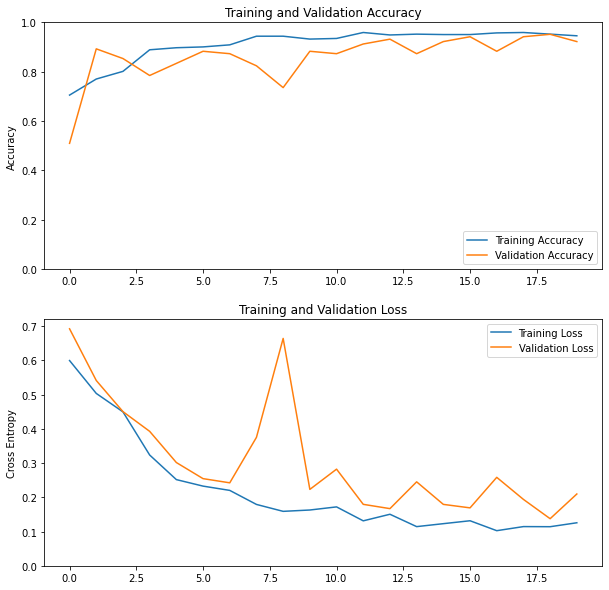

In [17]:
#plot model
acc = new_model_stop.history['acc']
val_acc = new_model_stop.history['val_acc']

loss = new_model_stop.history['loss']
val_loss = new_model_stop.history['val_loss']

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim([min(plt.ylim()), 1])
ax[0].set_title('Training and Validation Accuracy')

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set_ylabel('Cross Entropy')
ax[1].set_ylim([0,max(plt.ylim())])
ax[1].set_title('Training and Validation Loss')
plt.savefig('final-val-acc')
plt.show();

In [24]:
# Running test set 
test_generator = test_datagen.flow_from_directory(test_folder, 
                                                  target_size=(150, 150), 
                                                  batch_size=50, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
13/13 [==============================] - 7s 518ms/step - loss: 0.4360 - acc: 0.8365
test acc: 0.8365384340286255


In [25]:
# Using all images in test folder to run model in test set
# increasing batch size from 50 to 624 
test_generator_1 = test_datagen.flow_from_directory(test_folder, 
                                                  target_size=(150, 150), 
                                                  batch_size=624, 
                                                  class_mode='binary',
                                                   shuffle=False)
test_loss, test_acc = model.evaluate(test_generator_1)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
1/1 [==============================] - 0s 1ms/step - loss: 0.4360 - acc: 0.8365
test acc: 0.8365384340286255


In [27]:
# making predictions to see other scores in our model
predictions = model.predict_classes(test_generator_1)
# reshape the data
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int32)

In [28]:
# create the data sets-test set
test_images, test_labels = next(test_generator_1)

In [29]:
# using classification to get predictions 
# giving Pneumonia and Normal class 0 and 1
print(classification_report(test_labels, predictions, 
                            target_names = 
                            ['Pneumonia (Class 0)','Normal (Class 1)']
                           ))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.91      0.62      0.74       234
   Normal (Class 1)       0.81      0.96      0.88       390

           accuracy                           0.84       624
          macro avg       0.86      0.79      0.81       624
       weighted avg       0.85      0.84      0.83       624



In [30]:
# instantiate confusion matrix
conf = confusion_matrix(test_labels,predictions)
conf

array([[146,  88],
       [ 14, 376]])

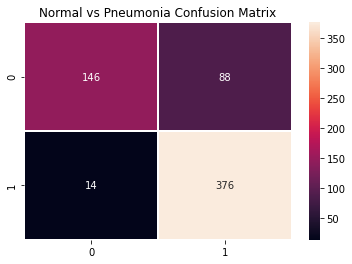

In [31]:
# plot confusion matrix
ax = plt.axes()
sns.heatmap(conf, linewidths=1, annot=True, fmt='g', ax=ax);
ax.set_title('Normal vs Pneumonia Confusion Matrix')
plt.savefig('Normal vs Pneumonia ')
plt.show();